In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


In [65]:
dataset = pd.read_csv("x64/Release/DataV1/MergeInsertion.csv")
dataset.shape

(500, 4)

In [3]:
dataset.head(n=15   )

,Size,S,Time,Comparison
0,1000000,0,235972,16588926
1,2000000,0,507488,34281070
2,3000000,0,726706,52410239
3,4000000,0,973861,70704212
4,5000000,0,1238785,89304134
5,6000000,0,1470576,107994625
6,7000000,0,1704163,126788120
7,8000000,0,1948739,145614866
8,9000000,0,2218828,164655992
9,10000000,0,2475294,183832378


In [26]:
def sizeAgainstTime(s,i):
    sWithTime = dataset[dataset["Size"] == s]
    #print(sWithTime)
    sWithTime = sWithTime.drop(["Size"], axis = 1)
    #print(sWithTime)
    sWithTime = sWithTime[1:]
    #print(sWithTime)
    g = sb.regplot(x = sWithTime["S"], y = sWithTime["Comparison"], data=sWithTime, logx = True, ax = axs[i])


In [70]:
def GenerateGraphFixedS(S_Size):
    x = np.linspace(1000000,10000000,10,dtype=int)
    y = (S_Size * x) + x*np.log10(x/S_Size)

    x2 = dataset[dataset["S"] == S_Size]["Size"]
    y2 =  dataset[dataset["S"] == S_Size]["Comparison"]

    x3 = np.linspace(1000000,10000000,10,dtype=int)
    y3 = (x) + x*np.log10(x/S_Size)
    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'b')
    plt.plot(x2,y2, 'g')
    plt.plot(x3,y3, 'r')
    # show the plot
    plt.show()

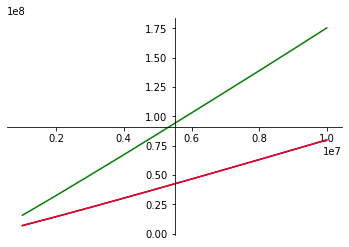

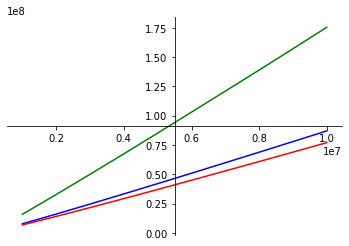

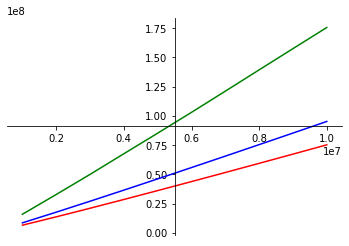

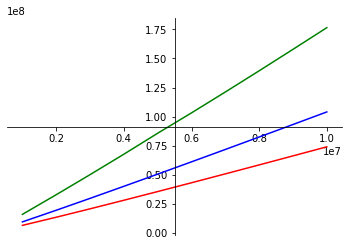

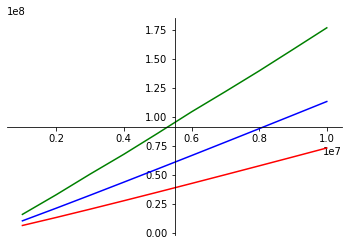

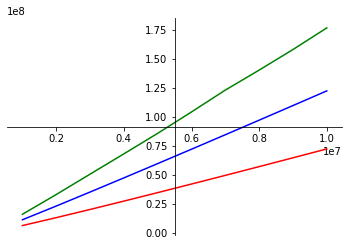

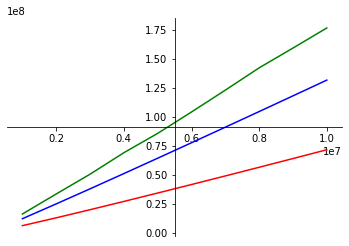

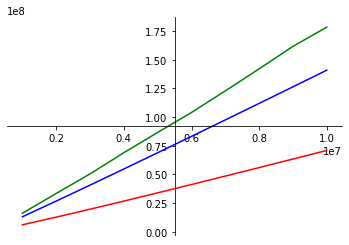

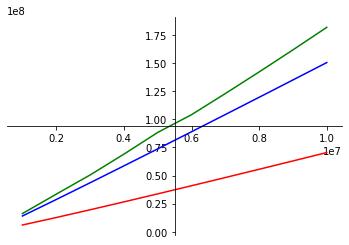

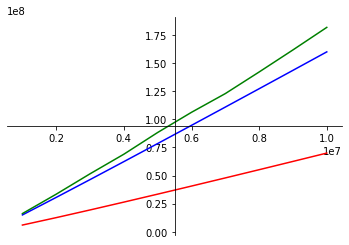

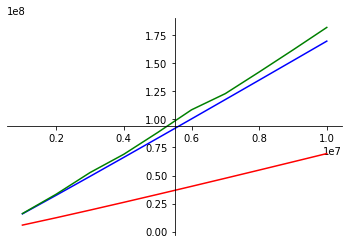

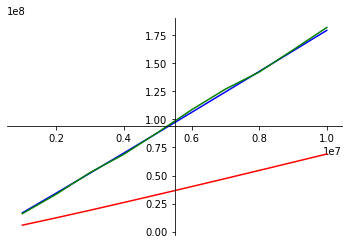

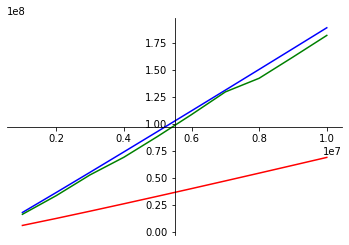

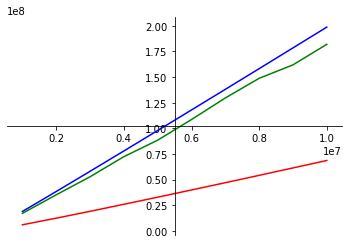

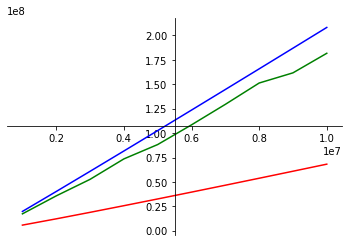

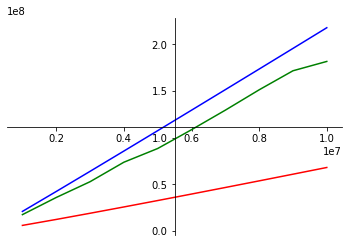

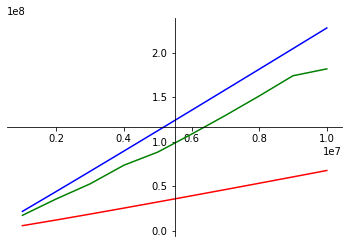

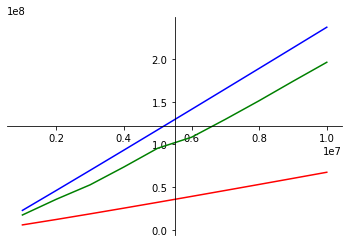

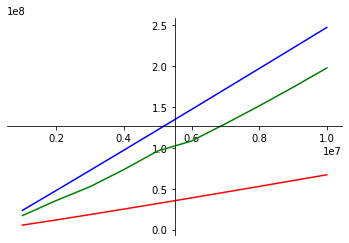

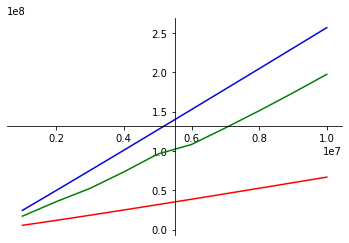

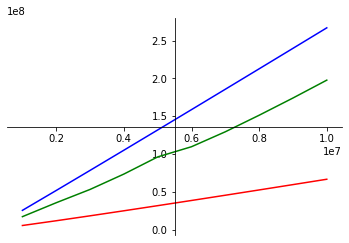

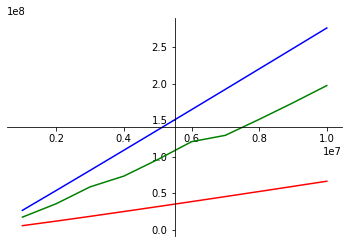

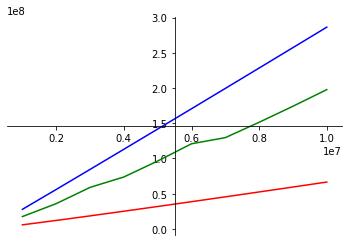

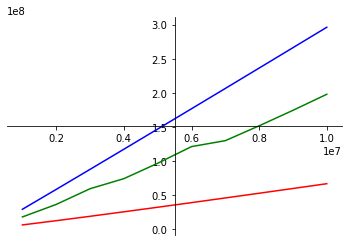

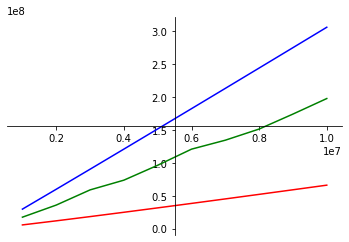

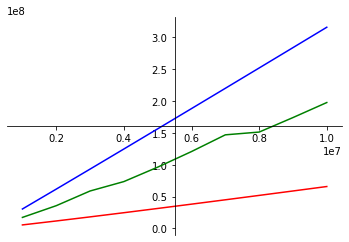

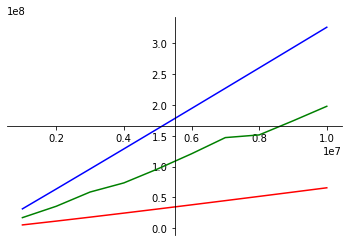

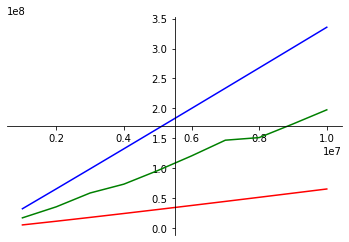

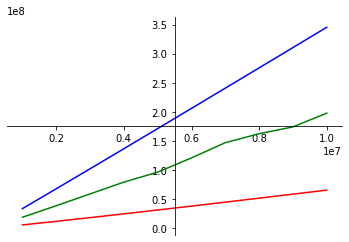

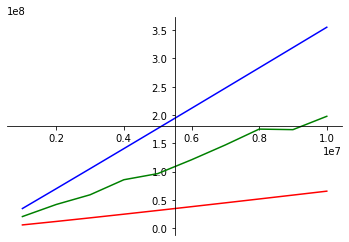

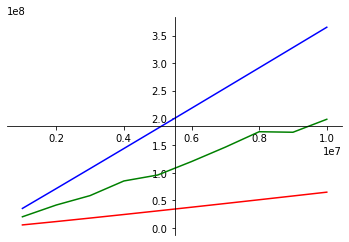

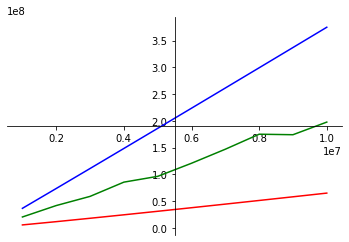

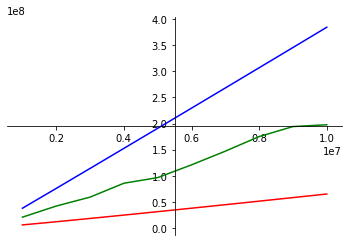

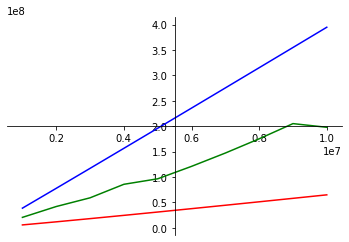

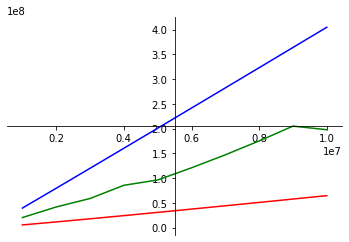

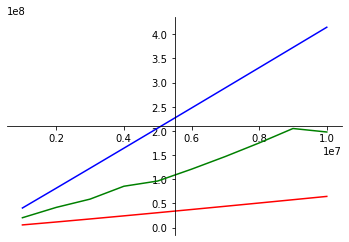

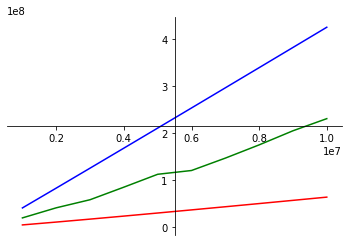

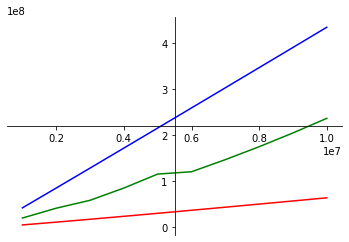

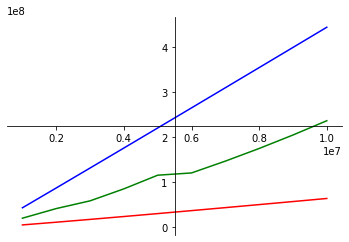

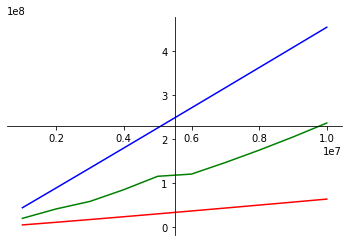

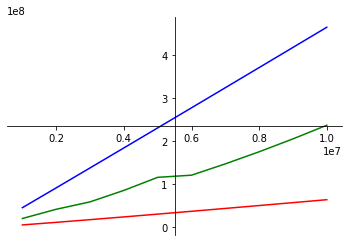

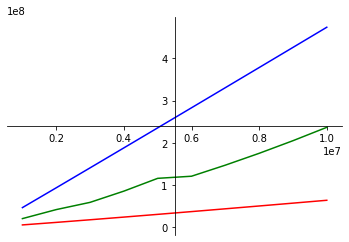

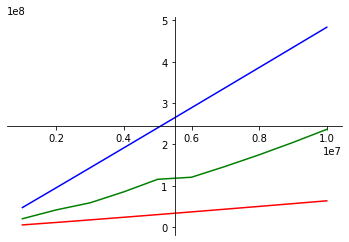

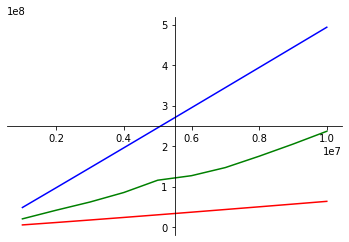

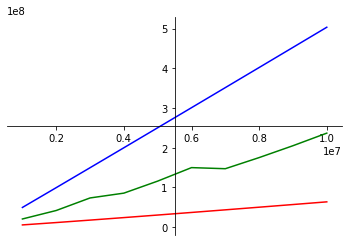

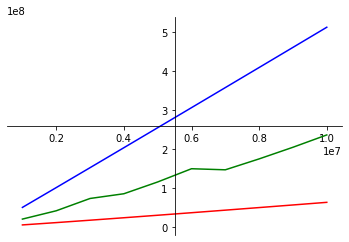

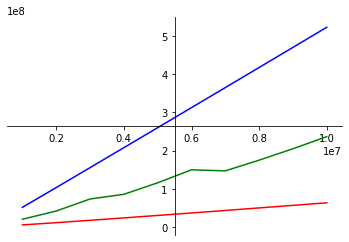

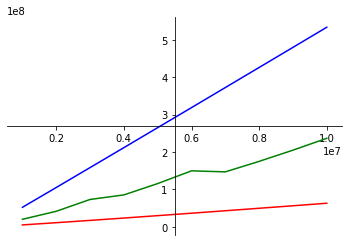

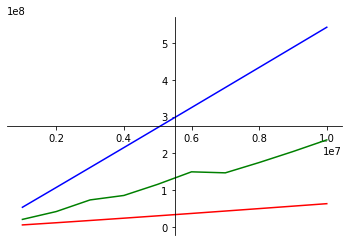

In [71]:
for i in range(1,50):
    GenerateGraphFixedS(i)

In [68]:
def GenerateGraphFixedN(N):
    x = np.linspace(1,49,49,dtype=int)
    y = (N * x) + N*np.log10(N/x)

    x2 = dataset[dataset["Size"] == N]["S"]
    y2 =  dataset[dataset["Size"] == N]["Comparison"]

    x3 = np.linspace(1,49,49,dtype=int)
    y3 =  N + N*np.log10(N/x)
    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'b')
    plt.plot(x2,y2, 'g')
    plt.plot(x3,y3, 'r')
    # show the plot
    plt.show()

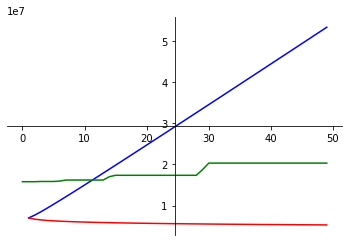

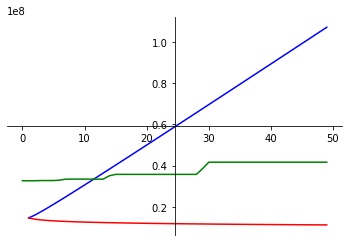

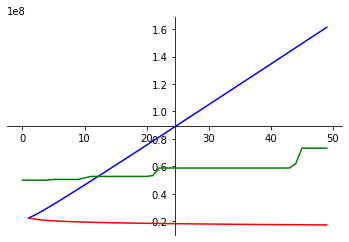

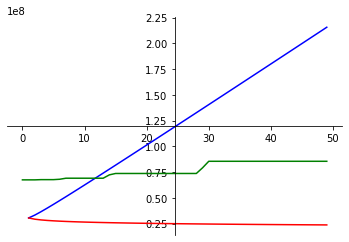

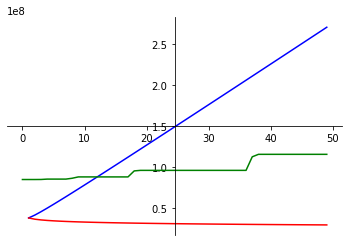

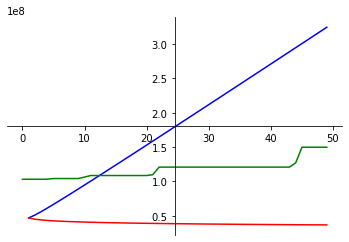

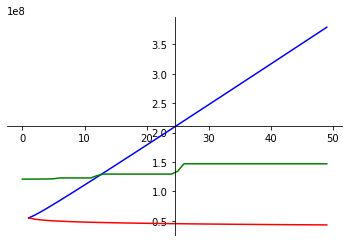

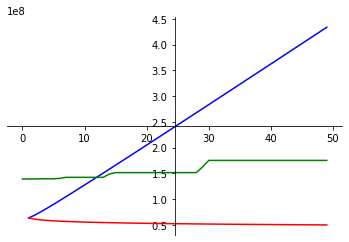

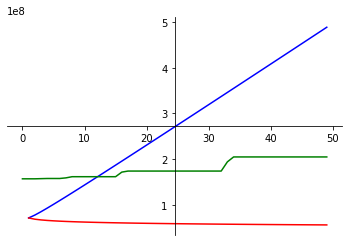

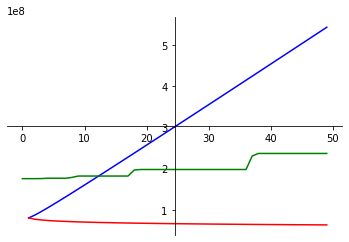

In [69]:
for i in range(1,11):
    GenerateGraphFixedN(1000000 * i)

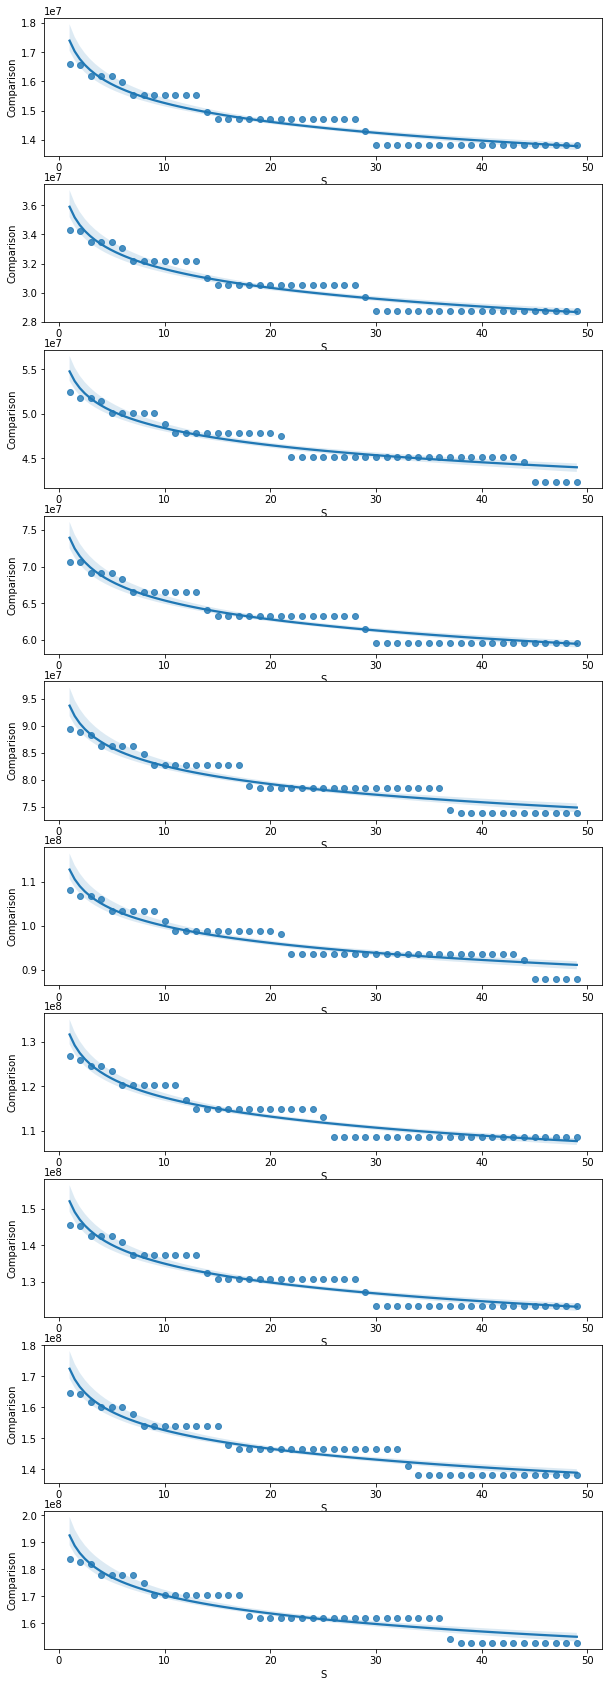

In [27]:
fig, axs = plt.subplots(10, figsize=(10, 30))
for i in range(1,11):
    sizeAgainstTime(1000000 * i,i -1)

In [71]:
nWithTime = dataset[dataset["S"] == 10]

In [72]:
nWithTime = nWithTime.drop(["S"], axis = 1)

In [73]:
nWithTime

,Size,Time,Comparison
100,1000000,105197,14758691
101,2000000,207661,30570439
102,3000000,318816,46460283
103,4000000,440008,63223225
104,5000000,513444,78609757
105,6000000,640074,96018638
106,7000000,777187,114544947
107,8000000,860139,130558125
108,9000000,963105,146490655
109,10000000,1029389,162340262


In [76]:
sb.scatterplot(data = nWithTime, x = "S", y = "Comparison")

ValueError: Could not interpret value `S` for parameter `x`